In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Simple Linear Regression
`y = b0 + b1x1 + e`

- y - Dependent Variable
- b0 - Intercept
- x1 - Independent Variable
- b1 - Slope for x1
- e - Error or Residual

\begin{equation*}
\text{Slope of independent variable (x1)}  = \frac{\text{Covariance of x and y}}{\text{(Varianace of X)}} 
\end{equation*}
\begin{equation*}
\text{Slope of independent variable (x1)}  = \frac{\sum{(x-\bar{x})(y-\bar{y})}}{\sum{(x-\bar{x})^2}}
\end{equation*}

Note: Correlation formula is very simlar to above. In denominator, instead of covariance of x its STD of x and y
\begin{equation*}
\text{Correlation of x and y}  = \frac{(x-\bar{x})(y-\bar{y})}{STD. of X * STD. of Y}
\end{equation*}

In [3]:
net_profit_margin = np.array([4,5,10,9,5,6,12,3]) 
R_and_D_Expense = np.array([8,10,6,5,7,9,5,10]) 
slope, intercept = np.polyfit(R_and_D_Expense, net_profit_margin, 1)
print(slope)
print(intercept)

-1.300000000000001
16.500000000000007


In [4]:
def slope(dependent, independent):
    dep_mean=np.mean(dependent)
    indep_mean=np.mean(independent)
    dep = dependent - dep_mean
    indep = independent - indep_mean
    numerator = (np.sum(dep * indep))/(len(dependent))
    return (numerator/np.var(independent))

In [5]:
slope(net_profit_margin,R_and_D_Expense)

-1.3

## Linear regression with Kaggle Datasets

### Data Clean up!!

In [3]:
ds = pd.read_csv("./Walmart_sales.csv")

In [4]:
ds.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
ds["Store"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [6]:
ds['Date'] = pd.to_datetime(ds['Date'], format='%d-%m-%Y')

In [31]:
print(ds["Date"].min())
print(ds["Date"].max())

2010-02-05 00:00:00
2012-10-26 00:00:00


In [13]:
ds["Fuel_Price"].isnull().any() or ds["Weekly_Sales"].isnull().any()

False

## Perform linear regerssion with fuel price and sales

In [15]:
total_data_len = len(ds)
train_data_len = round(total_data_len*0.7)
validation_data_len = total_data_len - train_data_len
train = ds[0:train_data_len].copy()
validation = ds[train_data_len:total_data_len].copy()

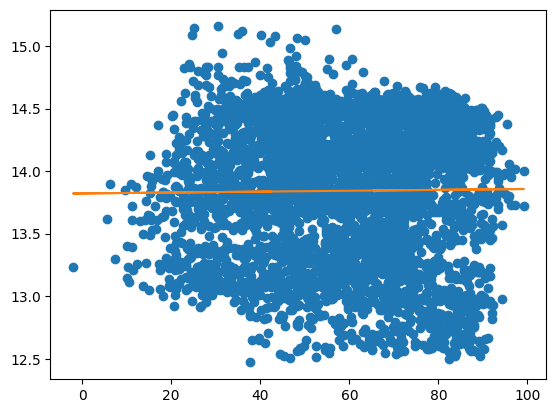

In [37]:
sales = train["Weekly_Sales"].values 
sales = np.log1p(sales )## Dependent Variable
temp = train["Temperature"].values ## Independent Variable
trend = np.polyfit(temp, sales, 1)
# plot the scatter points
plt.plot(temp, sales, 'o')
# calculate the trendline
trendpoly = np.poly1d(trend) 
# plot the trend line
plt.plot(temp, trendpoly(cpi))

#### from above graph its clear that sales not impacted by temperature